In [1]:
import torch 
import torchvision
from torchvision import transforms
import torchvision.datasets as datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from glob import glob
from PIL import Image

/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <ADC0A61A-5B83-3A02-975F-EE5DFF441305> /Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Data Loading

In [2]:
df_data = pd.read_csv("HAM10000_metadata")
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:

img_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob((os.path.join('*', '*.jpg')))}

df_data['img_path'] = df_data['image_id'].map(img_path.get)

#drop rows with no image path
df_data.dropna(inplace=True)
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,img_path
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,HAM10000_images_part_2/ISIC_0031633.jpg
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern,HAM10000_images_part_1/ISIC_0025837.jpg


In [4]:
def load_image(image_path):
    try:
        image = Image.open(image_path)
        return np.asarray(image.resize((32, 32)))
    except Exception as e:
        print(f"Error loading image '{image_path}': {e}")
        return None

In [5]:
def transpose(img):
    return np.transpose(img, (2, 0 ,1))

In [6]:
df_data['img'] = df_data['img_path'].map(load_image)
df_data['img'] = df_data['img'].apply(transpose)
df_data.dropna()
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,img_path,img
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025030.jpg,"[[[24, 56, 106, 143, 167, 173, 177, 178, 185, ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0026769.jpg,"[[[190, 199, 200, 205, 207, 207, 209, 201, 199..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025661.jpg,"[[[35, 83, 128, 161, 174, 180, 191, 192, 199, ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,HAM10000_images_part_2/ISIC_0031633.jpg,"[[[155, 188, 210, 220, 228, 233, 235, 234, 238..."
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern,HAM10000_images_part_1/ISIC_0025837.jpg,"[[[122, 158, 179, 184, 191, 188, 194, 195, 199..."


In [7]:
print(df_data.shape)
print(df_data['img'].iloc[10].shape)

(8039, 10)
(3, 32, 32)


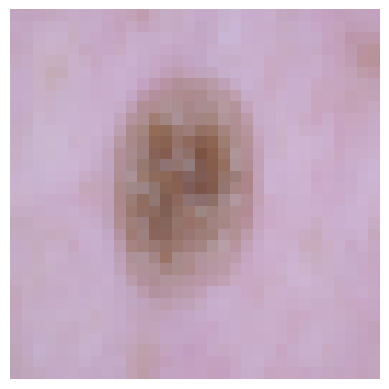

In [8]:
img = df_data['img'].iloc[10]
img = np.transpose(img, (1, 2, 0))
plt.imshow(img, cmap = "Greys_r")
plt.gca().axis("off")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data[['lesion_id', 'img']], df_data['dx'], test_size=0.2, random_state=42)
X_train

,lesion_id,img
1156,HAM_0000827,"[[[168, 176, 178, 179, 178, 185, 184, 184, 191..."
373,HAM_0001389,"[[[140, 148, 154, 163, 165, 171, 172, 172, 173..."
5382,HAM_0002885,"[[[242, 234, 240, 244, 244, 245, 247, 246, 246..."
6162,HAM_0002309,"[[[232, 233, 236, 236, 237, 237, 239, 239, 240..."
7735,HAM_0006567,"[[[183, 182, 184, 185, 187, 190, 190, 191, 192..."
...,...,...
6604,HAM_0003747,"[[[225, 225, 223, 222, 224, 228, 228, 229, 232..."
6832,HAM_0000464,"[[[160, 165, 169, 172, 172, 174, 177, 183, 185..."
1081,HAM_0003715,"[[[215, 218, 220, 217, 214, 218, 219, 221, 222..."
9457,HAM_0000675,"[[[164, 168, 172, 175, 175, 175, 177, 180, 182..."


### First Logistic Regression Model

In [10]:
n, p = X_train.shape[0], X_train.shape[1] - 1

img_tensors = [torch.Tensor(img) for img in X_train['img'].values]
X_train['img_tensor'] = img_tensors
print(X_train.shape)

img_tensors_tst = [torch.Tensor(img) for img in X_test['img'].values]
X_test['img_tensor'] = img_tensors_tst
print(X_test.shape)

X_train_flat = torch.stack([img.flatten() for img in X_train['img_tensor']])
X_train_flat.shape

/var/folders/nd/3yjvm85j3rq1vhh53yn6cy0r0000gn/T/ipykernel_70938/3824429122.py:3: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  img_tensors = [torch.Tensor(img) for img in X_train['img'].values]


(6431, 3)
(1608, 3)


torch.Size([6431, 3072])

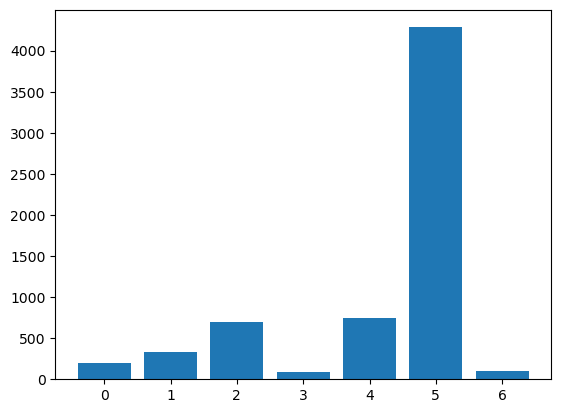

In [98]:
# bar plot: diagnosis
y_train
#y_train.plot(kind = 'bar')

# Count the occurrences of each class in y_train
counts = np.bincount(y_train)

# Create a bar plot
plt.bar(range(len(counts)), counts)

# Show the plot
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
f = LR.fit(X_train_flat, y_train)

/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
X_train_flat

tensor([[168., 176., 178.,  ...,  90.,  56.,  31.],
        [140., 148., 154.,  ..., 124., 109.,  93.],
        [242., 234., 240.,  ..., 151., 147., 145.],
        ...,
        [215., 218., 220.,  ..., 118., 116., 109.],
        [164., 168., 172.,  ..., 153., 139., 137.],
        [145., 153., 154.,  ..., 166., 166., 159.]])

In [13]:
LR.score(X_train_flat, y_train)

0.7017571139791634

### Convolutional Neural Net
We already flattened the data, so that's pretty cool!

In [84]:
from torch.nn import Conv2d, MaxPool2d, Parameter
from torch.nn.functional import relu

import torch.nn as nn
from  torch.nn import ReLU

In [85]:
print(X_train['img'].iloc[0].shape)
print(X_test['img'].iloc[0].shape)

(3, 32, 32)
(3, 32, 32)


In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [87]:
X_train_img = torch.stack([torch.from_numpy(img) for img in X_train['img'].tolist()])
y_train = torch.Tensor(y_train.tolist())

X_test_img = torch.stack([torch.from_numpy(img) for img in X_test['img'].tolist()])
y_test = torch.Tensor(y_test.tolist())

In [88]:
data_loader_train = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_train_img, y_train),
    batch_size = 100,
    shuffle = True
)

data_loader_val = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_test_img, y_test),
    batch_size = 100,
    shuffle = True
)

X, y = next(iter(data_loader_train))

In [89]:
def evaluate(model, multichannel = False):

    # count the number of total observations and correct predictions
    total = 0
    total_correct = 0

    # loop through the data loader
    for X, y in data_loader_val:
        X = X.float()
        y = y.long()

        # used for evaluating ImageNet later
        if multichannel:
            X = torch.tile(X, dims = (1, 3, 1, 1))

        # move the data to the device (ideally, to gpu)

        # compute the predictions
        scores = model.forward(X)
        y_pred =  torch.argmax(scores, dim = 1)

        # update the total and the number of correct predictions
        total += X.size(0)
        total_correct += (y_pred == y).sum().item()

    print(f"validation accuracy = {total_correct / total:.3f}")
#--

In [90]:
import torch.optim as optim
def train(model, k_epochs = 1, print_every = 2000, evaluate_after_epoch = True, multichannel = False, **opt_kwargs):

        # loss function is cross-entropy (multiclass logistic)
    loss_fn = nn.CrossEntropyLoss()

    # optimizer is SGD with momentum
    optimizer = optim.SGD(model.parameters(), **opt_kwargs)

    for epoch in range(k_epochs):
        for i, data in enumerate(data_loader_train):
            X, y = data
            X = X.float()
            y = y.long()
            
            if multichannel:
                X = torch.tile(X, dims = (1, 3, 1, 1))

            # clear any accumulated gradients
            optimizer.zero_grad()

            # compute the loss
            y_pred = model(X)
            loss   = loss_fn(y_pred, y)

            # compute gradients and carry out an optimization step
            loss.backward()
            optimizer.step()

            if (i + 1) % print_every == 0:
                print(f"Epoch {epoch}, batch {i:>3}, loss on batch: {loss.item():.3f}")

        if evaluate_after_epoch:
            print(f"Epoch {epoch}: ", end = "")
            evaluate(model)

In [91]:
class ConvNet_Simplest(nn.Module):
    def __init__(self):
        super().__init__()

        self.pipeline = torch.nn.Sequential(
            nn.Flatten(),
            nn.Linear(3072, 32)
        )

    def forward(self, x):
        return self.pipeline(x)
    
class ConvNet_class(nn.Module):
    def __init__(self):
        super().__init__()

        self.pipeline = torch.nn.Sequential(
            nn.Conv2d(3, 100, 5),
            ReLU(),
            nn.Conv2d(100, 50, 3),
            ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(50, 50, 3),
            ReLU(),
            nn.Conv2d(50, 50, 3),
            ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(800, 512),
            ReLU(),
            nn.Linear(512, 128),
            ReLU(),
            nn.Linear(128, 7)
        )

    def forward(self, x):
        return self.pipeline(x)

class ConvNet_Dropout(nn.Module):
    def __init__(self):
        super().__init__()

        self.pipeline = torch.nn.Sequential(
            nn.Conv2d(3, 100, 5),
            ReLU(),
            nn.Conv2d(100, 50, 3),
            ReLU(),
            nn.MaxPool2d(2, 2),
            #nn.Dropout(0.25),
            nn.Conv2d(50, 50, 3),
            ReLU(),
            nn.Conv2d(50, 50, 3),
            ReLU(),
            nn.MaxPool2d(2, 2),
            #nn.Dropout(0.05),
            nn.Flatten(),
            nn.Linear(800, 512),
            ReLU(),
            nn.Linear(512, 128),
            ReLU(),
            nn.Linear(128, 7)
        )

    def forward(self, x):
        return self.pipeline(x)

Start with a very simple neural network:

In [92]:
model = ConvNet_Simplest()
from torchsummary import summary
summary(model, input_size=(3, 32, 32))
train(model, k_epochs = 15, lr = 0.1, evaluate_after_epoch = True, momentum = 0.9)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                   [-1, 32]          98,336
Total params: 98,336
Trainable params: 98,336
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 0.38
Estimated Total Size (MB): 0.41
----------------------------------------------------------------
Epoch 0: validation accuracy = 0.502
Epoch 1: validation accuracy = 0.582
Epoch 2: validation accuracy = 0.560
Epoch 3: validation accuracy = 0.657
Epoch 4: validation accuracy = 0.450
Epoch 5: validation accuracy = 0.335
Epoch 6: validation accuracy = 0.664
Epoch 7: validation accuracy = 0.657
Epoch 8: validation accuracy = 0.476
Epoch 9: validation accuracy = 0.572
Epoch 10: validation accuracy = 0.628
Epoch 11: validation

What about the model we used in class?

In [94]:
model = ConvNet_class()
train(model, k_epochs = 5, lr = 0.01, evaluate_after_epoch = True, momentum = 0.9)

Epoch 0: validation accuracy = 0.654
Epoch 1: validation accuracy = 0.653
Epoch 2: validation accuracy = 0.654
Epoch 3: validation accuracy = 0.669


KeyboardInterrupt: 

oof. That's not good!

What if we try including dropout?

In [83]:
model = ConvNet_Dropout()
train(model, k_epochs = 5, lr = 0.1, evaluate_after_epoch = True, momentum = 0.9)

Epoch 0: validation accuracy = 0.037
Epoch 1: validation accuracy = 0.037
Epoch 2: validation accuracy = 0.037
Epoch 3: 

KeyboardInterrupt: 

Let's try a model as recommended by a scientific paper on this problem

In [69]:
import torch.nn.functional as F

class ConvNet_Expert(nn.Module):
    def __init__(self):
        super().__init__()

        self.pipeline = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(3, stride=3),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(0.25),

            nn.Flatten(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 7),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.pipeline(x)

In [70]:
model = ConvNet_Expert()
train(model, k_epochs = 5, lr = 0.1, evaluate_after_epoch = True, momentum = 0.9)

Epoch 0: validation accuracy = 0.654
Epoch 1: validation accuracy = 0.654
Epoch 2: validation accuracy = 0.654
Epoch 3: validation accuracy = 0.654
Epoch 4: validation accuracy = 0.654


This is not much better than the simplest neural net

### Data Augmentation

Example of random crop and flip on an example image

original image


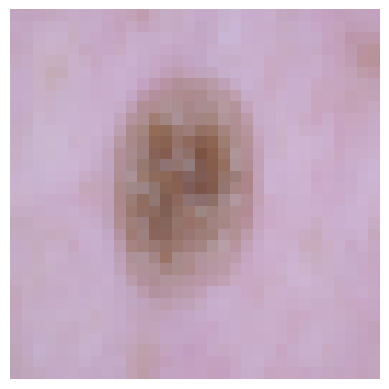

transformed image


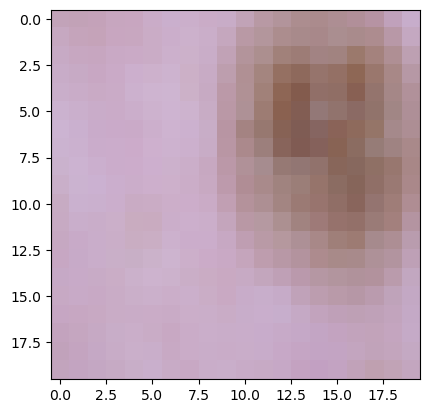

In [ ]:
from PIL import Image

# Experiment with a sample of the data
X_train_flat = X_train_flat[1:10]

from torchvision.transforms import v2
transforms = v2.Compose([
    v2.RandomResizedCrop(size=(20, 20), antialias=True),
    v2.RandomHorizontalFlip(p=1)
    ])

# original image
print("original image")
plt.imshow(df_data['img'].iloc[10], cmap = "Greys_r")
plt.gca().axis("off")
plt.show()

# transformed image
print("transformed image")
img = Image.fromarray(df_data["img"].iloc[10])
img = transforms(img)
plt.imshow(img)